In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# dataset.keys()

In [ ]:
# dataset.shape

In [4]:
import numpy as np

In [ ]:
# type(dataset)

In [ ]:
# dataset.head()

In [ ]:
# dataset.describe()

In [5]:
# remove data with '?'

dataset = dataset[~dataset.isin(['?'])]

In [6]:
# remove data with nan value

dataset = dataset.dropna(axis=0)

In [ ]:
# print(np.unique(dataset.Sex))
# print(np.unique(dataset.ChestPainType))
# print(np.unique(dataset.RestingECG))
# print(np.unique(dataset.ExerciseAngina))
# print(np.unique(dataset.ST_Slope))

In [7]:

dataset.Sex.replace(
    {
        'F' : 0,
        'M' : 1
    },
    inplace=True
)
dataset.ChestPainType.replace(
    {
      'TA' : 0,
      'ATA' : 1,
      'NAP' : 2,
      'ASY' : 3
    },
    inplace=True
)
dataset.RestingECG.replace(
    {
      'Normal' : 0,
      'ST' : 1,
      'LVH' : 2
    },
    inplace=True
)
dataset.ExerciseAngina.replace(
    {
        'N' : 0,
        'Y' : 1
    },
    inplace=True
)
dataset.ST_Slope.replace(
    {
        'Flat' : 0,
        'Up' : 1,
        'Down' : 2
    },
    inplace=True
)


In [ ]:
# data = pd.get_dummies(dataset, columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
# data.drop(['Sex_F','ExerciseAngina_N','ST_Slope_Down','RestingECG_LVH','ChestPainType_NAP'], axis=1, inplace=True)

In [ ]:
# data.keys()

In [8]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,0,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,0,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,0,1
914,68,1,3,144,193,1,0,141,0,3.4,0,1
915,57,1,3,130,131,0,0,115,1,1.2,0,1
916,57,0,1,130,236,0,2,174,0,0.0,0,1


In [23]:
from matplotlib import pyplot as plt

In [ ]:
# dataset.hist(figsize = (10, 10))
# plt.show()

In [ ]:
# pd.crosstab(dataset.Age,dataset.HeartDisease).plot(kind="bar",figsize=(16,4))
# plt.title('Heart Disease Frequency for Ages')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

In [9]:
data = dataset

In [10]:
x = np.array(data.drop(['HeartDisease'],1))
y = np.array(data['HeartDisease'])

C:\Users\Alok Kumar\AppData\Local\Temp\ipykernel_1488\4175863221.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop(['HeartDisease'],1))


In [ ]:
# np.unique(y)

In [ ]:
# data = data.apply(pd.to_numeric)
# data.dtypes

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)
# X

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size = 0.2)

In [ ]:
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

In [14]:
from keras.utils.np_utils import to_categorical

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# print(y_train.shape)
# print(y_test.shape)

**Model : Neural Network**

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

In [17]:
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=11, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(16,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(8,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2,activation='sigmoid'))

  adam = Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

In [18]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

C:\Users\Alok Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# type(model)

In [19]:
batch_size = 20
epochs = 100

In [20]:
training = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data =(x_test,y_test))

Epoch 1/100
37/37 [==============================] - 2s 18ms/step - loss: 0.9899 - accuracy: 0.4973 - val_loss: 0.6829 - val_accuracy: 0.5978
Epoch 2/100
37/37 [==============================] - 0s 7ms/step - loss: 0.7617 - accuracy: 0.5068 - val_loss: 0.6876 - val_accuracy: 0.5326
Epoch 3/100
37/37 [==============================] - 0s 7ms/step - loss: 0.7325 - accuracy: 0.5014 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 4/100
37/37 [==============================] - 0s 6ms/step - loss: 0.6998 - accuracy: 0.5014 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 5/100
37/37 [==============================] - 0s 7ms/step - loss: 0.6879 - accuracy: 0.5245 - val_loss: 0.6933 - val_accuracy: 0.4837
Epoch 6/100
37/37 [==============================] - 0s 6ms/step - loss: 0.6809 - accuracy: 0.5191 - val_loss: 0.6919 - val_accuracy: 0.5054
Epoch 7/100
37/37 [==============================] - 0s 6ms/step - loss: 0.6879 - accuracy: 0.5259 - val_loss: 0.6925 - val_accuracy: 0.5109
Epoch 8/100


Epoch 59/100
37/37 [==============================] - 0s 6ms/step - loss: 0.5659 - accuracy: 0.7371 - val_loss: 0.4112 - val_accuracy: 0.8533
Epoch 60/100
37/37 [==============================] - 0s 7ms/step - loss: 0.5530 - accuracy: 0.7262 - val_loss: 0.4105 - val_accuracy: 0.8587
Epoch 61/100
37/37 [==============================] - 0s 6ms/step - loss: 0.5500 - accuracy: 0.7820 - val_loss: 0.4040 - val_accuracy: 0.8696
Epoch 62/100
37/37 [==============================] - 0s 7ms/step - loss: 0.5125 - accuracy: 0.7561 - val_loss: 0.4002 - val_accuracy: 0.8641
Epoch 63/100
37/37 [==============================] - 0s 7ms/step - loss: 0.5817 - accuracy: 0.7520 - val_loss: 0.4038 - val_accuracy: 0.8533
Epoch 64/100
37/37 [==============================] - 0s 7ms/step - loss: 0.5783 - accuracy: 0.7316 - val_loss: 0.4070 - val_accuracy: 0.8641
Epoch 65/100
37/37 [==============================] - 0s 7ms/step - loss: 0.5572 - accuracy: 0.7398 - val_loss: 0.4017 - val_accuracy: 0.8641
Epoch 

In [21]:
score = model.evaluate(x_test, y_test, verbose = 1)
# test loss and test accuracy
score

6/6 [==============================] - 0s 4ms/step - loss: 0.3662 - accuracy: 0.8804


[0.3662128448486328, 0.8804348111152649]

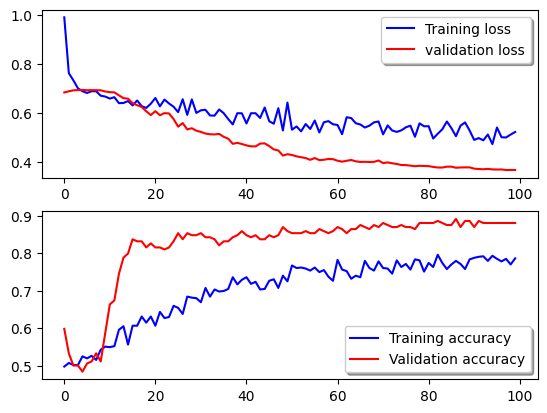

In [24]:
# model accuracy and loss
fig, ax = plt.subplots(2,1)
ax[0].plot(training.history['loss'], color='b', label="Training loss")
ax[0].plot(training.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(training.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(training.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [25]:
label = ['false','true']

In [41]:
result = model.predict([[48,0,3,138,214,0,0,108,1,1.5,1]])

1/1 [==============================] - 0s 87ms/step


In [42]:
print(result)
print(result[0][0])

[[1. 1.]]
1.0


In [43]:
ind = 0
if(result[0][1] <= result[0][1]):
  ind = 1
label[ind]

'true'

In [ ]:
matplotlib.pyplot.violinplot(data,
                             positions=None, vert=True,
                             widths=0.5, showmeans=False,
                             showextrema=True, showmedians=False,
                             quantiles=None, points=100,
                             bw_method=None, *, data=None)

In [37]:
import pickle

pickle.dump(model,open('model.pkl','wb'))

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

open('model.tflite','wb').write(tfmodel)

**Model : Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier()
m.fit(x_train,y_train)
m.score(x_test,y_test)